# Red wine Analysis
### Importing the necessary packages/modules and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Red_wine_.csv')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0


We can then use the **columns** attribute of the Pandas library to get to know more about what columns are present in the dataset.

In [3]:
df.columns
df.max(skipna = True, numeric_only = True)

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        3.90000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [4]:
print("The maximum rating for quality is ", df['quality'].max())

The maximum rating for quality is  8.0


We can then use the **correlation matrix** to find out which attributes of the dataset affect the quality i.e., the response vector more.

Text(0.5, 1.0, 'Heatmap of correlation coefficients for each attribute')

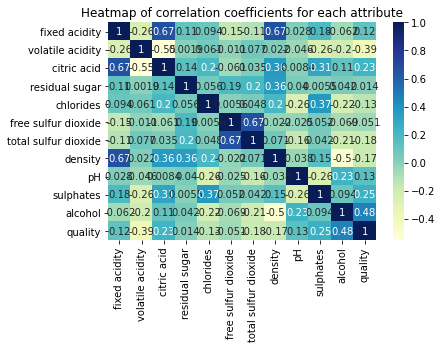

In [5]:
mat = df.corr() #creates a correlation matrix
sns.heatmap(mat,cmap = 'YlGnBu',annot = True) #creates a heatmap for that matrix
plt.title("Heatmap of correlation coefficients for each attribute")

### Dropping redundant columns and imputing missing values

#### Attribute selection and a check for missing values

In [6]:
data = df.drop(['residual sugar','free sulfur dioxide'],axis = 1)
print(data.columns)
print(data.isnull().sum())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


#### Imputing the missing values using the forward fill method

In [7]:
data = data.fillna(method = 'ffill')
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Creating classes and dividing the data at hand into those classes

<AxesSubplot:>

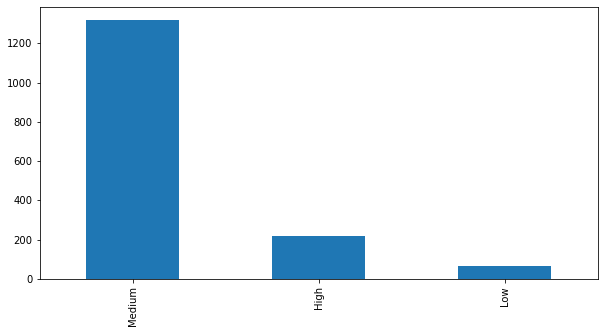

In [8]:
rating = []
for row in data['quality']:
    if row in range(3,5):    rating.append('Low')
    elif row in range(4,7):  rating.append('Medium')
    elif row > 6  : rating.append('High')
data['rating'] = rating
data.rating.value_counts().plot(kind = 'bar',figsize = (10,5))

### Checking for outliers

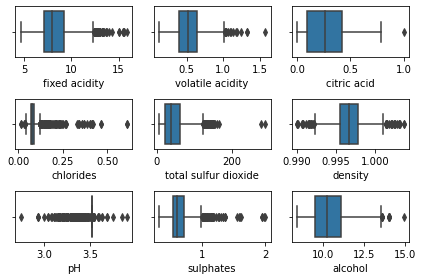

In [9]:
import matplotlib.pyplot as plt
plt.subplot(3,3,1)
sns.boxplot(x = data['fixed acidity'])

plt.subplot(3,3,2)
sns.boxplot(x = data['volatile acidity'])

plt.subplot(3,3,3)
sns.boxplot(x = data['citric acid'])

plt.subplot(3,3,4)
sns.boxplot(x = data['chlorides'])

plt.subplot(3,3,5)
sns.boxplot(x = data['total sulfur dioxide'])

plt.subplot(3,3,6)
sns.boxplot(x = data['density'])

plt.subplot(3,3,7)
sns.boxplot(x = data.pH)

plt.subplot(3,3,8)
sns.boxplot(x = data.sulphates)

plt.subplot(3,3,9)
sns.boxplot(x = data.alcohol)

plt.tight_layout()

#### Demonstration of the relationships of the attributes with most outliers with the target variable

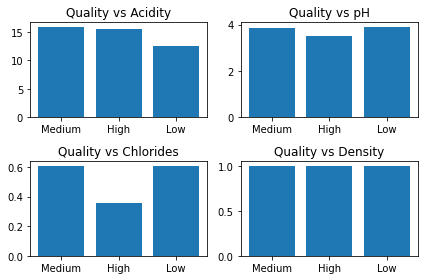

In [10]:
plt.subplot(2,2,1)
plt.bar(data.rating,data['fixed acidity'])
plt.title('Quality vs Acidity')

plt.subplot(2,2,2)
plt.bar(data.rating,data.pH)
plt.title('Quality vs pH')

plt.subplot(2,2,3)
plt.bar(data.rating, data.chlorides)
plt.title('Quality vs Chlorides')

plt.subplot(2,2,4)
plt.bar(data.rating, data.density)
plt.title('Quality vs Density')

plt.tight_layout()

As you can see, the quality of the wine isn't affected that much with **pH** and **Density**. But it varies when it comes to **Acidity** and **Chlorides**. Another notable point is that the **alcohol level** also has an impact pn the **quality of the wine** as it could be seen below. 

Text(0.5, 1.0, 'Quality vs Alcohol levels')

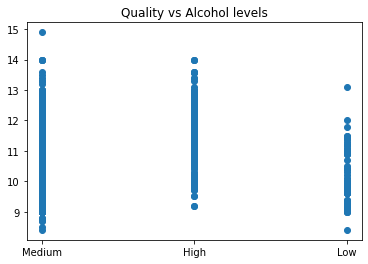

In [11]:
plt.scatter(data['rating'],data['alcohol'])
plt.title('Quality vs Alcohol levels')

## Building Regression and Classification Models and comparing the model scores

### Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
y = data.quality
features = ['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']
X = data[features]
X.head(2)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,0.076,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,0.098,67.0,0.9968,3.20,0.68,9.8


#### Splitting the data using the train_test_split() class from the model_selection module

In [13]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 80)
dt_model = DecisionTreeRegressor(max_leaf_nodes = 100, random_state = 1)
dt_model.fit(train_X,train_y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [15]:
dt_predictions  = dt_model.predict(val_X)
dt_mae = mean_absolute_error(dt_predictions, val_y)
#print(dt_mae)
print('The model score is',dt_model.score(val_X,val_y))

The model score is 0.1002592349927035


### Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 9)
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X,train_y)

RandomForestRegressor(random_state=1)

In [18]:
rf_predictions  = rf_model.predict(val_X)
rf_mae = mean_absolute_error(rf_predictions, val_y)
#print(rf_mae)
print('The model score is',rf_model.score(val_X,val_y))

The model score is 0.4548408443625397


### Decision Tree based Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtclf_model = DecisionTreeClassifier()
dtclf_model.fit(train_X,train_y)
print('The model score is',dtclf_model.score(val_X,val_y))

The model score is 0.6225


### Random Forest based Classification

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfclf_model = RandomForestClassifier()
rfclf_model.fit(train_X,train_y)
print('The model score is',rfclf_model.score(val_X,val_y))

The model score is 0.6575


##### As one can see, the classification model has given us the highest score. So, it is ideal to go with the **Random Forest Classifier** to predict the quality of the wine as it is clearly more of a *classification problem* than a *regression problem*.